In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('./CustomRetain.xlsx')
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300


In [2]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Average_Internet_Usage',
       'No_of_Tickets', 'Average_Talktime_Usage', 'Social_Class',
       'Subscription_Type', 'Base_Charge'],
      dtype='object')

In [130]:
df_test = df.sample(n = 500)
df_test.to_csv('customer_test.csv', index = False)

In [131]:
n = [1,2,3,4,5,1,2,3,4]
n.unique()

AttributeError: 'list' object has no attribute 'unique'

In [126]:
df["Social_Class"].unique()

array([1, 2, 3])

In [124]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Average_Internet_Usage        float64
No_of_Tickets                   int64
Average_Talktime_Usage        float64
Social_Class                    int64
Subscription_Type              object
Base_Charge                     int64
dtype: object

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaled_df = df[['Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Average_Internet_Usage',
       'No_of_Tickets', 'Average_Talktime_Usage', 'Social_Class',
       'Subscription_Type', 'Base_Charge']]

def encode_and_scale(scaled_df):

    categorical_cols = scaled_df.select_dtypes(include=['object']).columns
    numerical_cols = scaled_df.select_dtypes(include=['int64', 'float64']).columns
    print(scaled_df.columns)
    print("---")
    print(categorical_cols)
    print("---")
    print(numerical_cols)

    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        scaled_df[col] = le.fit_transform(scaled_df[col])
        label_encoders[col] = le

    scaler = StandardScaler()
    scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

    return scaled_df, label_encoders, scaler

scaled_df, label_encoders, scaler = encode_and_scale(scaled_df)

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Average_Internet_Usage', 'No_of_Tickets',
       'Average_Talktime_Usage', 'Social_Class', 'Subscription_Type',
       'Base_Charge'],
      dtype='object')
---
Index(['Gender', 'Location', 'Subscription_Type'], dtype='object')
---
Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Average_Internet_Usage', 'No_of_Tickets', 'Average_Talktime_Usage',
       'Social_Class', 'Base_Charge'],
      dtype='object')


/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_70714/255123032.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[col] = le.fit_transform(scaled_df[col])
/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_70714/255123032.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[col] = le.fit_transform(scaled_df[col])
/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_70714/255123032.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [116]:
import joblib

joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(scaled_df)

df['Cluster'] = kmeans.labels_

In [5]:
df["Cluster"].value_counts()

Cluster
2    2014
5    1449
7    1415
0    1280
4    1191
3    1131
6    1104
1     416
Name: count, dtype: int64

In [118]:
import joblib

joblib.dump(kmeans, 'kmeans_model_final.pkl')

['kmeans_model_final.pkl']

In [76]:
import joblib

kmeans_loaded = joblib.load('kmeans_model_main.pkl')

In [102]:
features_df = df.drop(columns=['CustomerID', 'Name', 'Cluster'])

sample = features_df.head(2)

In [111]:
sample = features_df.head(1)

In [112]:
sample

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge
0,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100


In [109]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encode_and_scale(scaled_df):

    categorical_cols = scaled_df.select_dtypes(include=['object']).columns
    numerical_cols = scaled_df.select_dtypes(include=['int64', 'float64']).columns

    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        scaled_df[col] = le.fit_transform(scaled_df[col])
        label_encoders[col] = le

    scaler = StandardScaler()
    scaled_df[numerical_cols] = scaler.fit_transform(scaled_df[numerical_cols])

    return scaled_df

sample_scaled = encode_and_scale(sample)

/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_11061/1348549853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[col] = le.fit_transform(scaled_df[col])
/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_11061/1348549853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[col] = le.fit_transform(scaled_df[col])
/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_11061/1348549853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [119]:
label_encoders

{'Gender': LabelEncoder(),
 'Location': LabelEncoder(),
 'Subscription_Type': LabelEncoder()}

In [120]:
def load_encoder(model_path):
    label_encoders = joblib.load(model_path)
    return label_encoders

encoders = load_encoder('label_encoders.pkl')

In [121]:
encoders

{'Gender': LabelEncoder(),
 'Location': LabelEncoder(),
 'Subscription_Type': LabelEncoder()}

In [122]:
def load_scaler(model_path):
    scaler = joblib.load(model_path)
    return scaler

scaler = load_scaler('scaler.pkl')
scaler

StandardScaler()

In [110]:
kmeans_loaded.predict(sample)

array([0, 7], dtype=int32)

In [10]:
new_df = df.copy()

In [11]:
import numpy as np

weight_subscription_length = -0.3
weight_monthly_bill = 0.5
weight_internet_usage = -0.4
weight_talktime_usage = -0.2
weight_tickets = 0.3

new_df['churn_score'] = (
    weight_subscription_length * (new_df['Subscription_Length_Months'] < 6).astype(int) +
    weight_monthly_bill * (new_df['Monthly_Bill'] > df['Monthly_Bill'].mean()).astype(int) +
    weight_internet_usage * (new_df['Average_Internet_Usage'] < new_df['Average_Internet_Usage'].quantile(0.25)).astype(int) +
    weight_talktime_usage * (new_df['Average_Talktime_Usage'] < new_df['Average_Talktime_Usage'].quantile(0.25)).astype(int) +
    weight_tickets * (new_df['No_of_Tickets'] > new_df['No_of_Tickets'].mean()).astype(int)
)

new_df['churn_prob'] = 1 / (1 + np.exp(-new_df['churn_score']))


In [12]:
np.random.seed(42)
new_df['churn_label'] = np.random.binomial(1, new_df['churn_prob'])

In [13]:
new_df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge,churn_score,churn_prob,churn_label
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100,-0.6,0.354344,0
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300,0.3,0.574443,0
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400,0.5,0.622459,0
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200,-0.1,0.475021,1
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300,0.0,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Customer_9996,55,Male,Suburban,34,676.156043,64.540758,3,158.962291,2,C,300,0.3,0.574443,0
9996,9997,Customer_9997,51,Female,Rural,16,337.508892,10.041086,0,128.771894,1,B,200,-0.4,0.401312,1
9997,9998,Customer_9998,57,Female,Rural,27,1483.984362,401.194578,1,397.613115,3,E,500,0.8,0.689974,0
9998,9999,Customer_9999,64,Male,Suburban,4,311.640946,87.497384,0,27.245347,1,B,200,-0.5,0.377541,0


In [14]:
new_df['churn_label'].value_counts()

churn_label
1    5533
0    4467
Name: count, dtype: int64

In [15]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Customer_9996,55,Male,Suburban,34,676.156043,64.540758,3,158.962291,2,C,300
9996,9997,Customer_9997,51,Female,Rural,16,337.508892,10.041086,0,128.771894,1,B,200
9997,9998,Customer_9998,57,Female,Rural,27,1483.984362,401.194578,1,397.613115,3,E,500
9998,9999,Customer_9999,64,Male,Suburban,4,311.640946,87.497384,0,27.245347,1,B,200


In [17]:
scaled_features_df = encode_and_scale(features_df)

In [24]:
X = scaled_features_df.values
y = new_df['churn_label']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [27]:
import torch.nn as nn

class FixedNeuronsNetwork(nn.Module):
    def __init__(self, num_features, num_classes, num_hidden_layers, hidden_neurons, layer_activation=nn.ReLU, final_activation=nn.Sigmoid):
        super(FixedNeuronsNetwork, self).__init__()
        
        layers = []
        
        layers.append(nn.Linear(num_features, hidden_neurons))
        layers.append(layer_activation())
        
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(layer_activation())
        
        layers.append(nn.Linear(hidden_neurons, num_classes))
        
        self.final_activation = final_activation()
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.network(x)
        output = self.final_activation(x)
        return output

In [28]:
from tqdm import tqdm
from sklearn.metrics import f1_score

def train_model(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs, device,patience):
    train_loss_history = []
    val_loss_history = []
    best_val_loss = float('inf')
    patience = patience  # Number of epochs to wait before stopping
    patience_counter = 0
    best_model = None

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0
        all_train_targets = []
        all_train_preds = []

        # Training loop
        with tqdm(total=len(train_loader), desc=f'Epoch [{epoch + 1}/{num_epochs}]', unit='batch') as pbar:
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                
                # Calculate loss
                loss = criterion(outputs, targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_train_loss += loss.item() * inputs.size(0)

                # Store targets and predictions for F1 score calculation
                all_train_targets.extend(targets.cpu().numpy())
                all_train_preds.extend(outputs.cpu().detach().numpy())

                # Update the progress bar
                pbar.set_postfix(loss=loss.item())
                pbar.update(1)

        # Calculate average training loss and F1 score for training
        avg_train_loss = total_train_loss / len(train_loader.dataset)
        train_loss_history.append(avg_train_loss)

        train_f1 = f1_score(np.squeeze(all_train_targets), np.where(np.squeeze(all_train_preds) > 0.5, 1, 0), pos_label=1, average='binary')

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        all_val_targets = []
        all_val_preds = []

        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)

                loss = criterion(outputs, targets)
                total_val_loss += loss.item() * inputs.size(0)

                all_val_targets.extend(targets.cpu().numpy())
                all_val_preds.extend(outputs.cpu().detach().numpy())

        # Calculate average validation loss and F1 score
        avg_val_loss = total_val_loss / len(test_loader.dataset)
        val_loss_history.append(avg_val_loss)

        val_f1 = f1_score(np.squeeze(all_val_targets), np.where(np.squeeze(all_val_preds) > 0.5, 1, 0), pos_label=1, average='binary')

        # Print training and validation results
        print(f"Epoch [{epoch + 1}/{num_epochs}] - Avg Train Loss: {avg_train_loss:.4f} | Train F1: {train_f1:.4f} | Avg Val Loss: {avg_val_loss:.4f} | Val F1: {val_f1:.4f}")

        # Step the learning rate scheduler
        scheduler.step(avg_train_loss)

        # Early stopping based on F1 score and patience counter
        if val_f1 > 0.8:
            print(f"Stopping training early at epoch {epoch + 1} as validation F1 score exceeded 0.8.")
            break

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model = model.state_dict()  # Save best model weights
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered after {patience} epochs with no improvement.")
            break

    model.load_state_dict(best_model)  # Load the best model before returning
    return model, train_loss_history, val_loss_history, train_f1, val_f1

In [29]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torch.optim.lr_scheduler import ReduceLROnPlateau

def create_data_loader(x_train, x_test, y_train, y_test, batch_size, sampling = True):
    """
    Takes input as torch tensors and creates data loaders.
    """
    
    # Create TensorDatasets and move them to the specified device
    train_dataset = TensorDataset(x_train, y_train.reshape(-1,1))
    test_dataset = TensorDataset(x_test, y_test.reshape(-1,1))
    
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    if sampling:
        class_counts = torch.bincount(y_train.long().view(-1))
        total_samples = len(y_train)
        class_weights = total_samples / (len(class_counts) * class_counts.float())
        sample_weights = class_weights[y_train.long().view(-1)]
        
        sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(y_train), replacement=True)

        # Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler = sampler, shuffle=False)
    else:
        # Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor,batch_size=512)

In [30]:
import torch.optim as optim

input_size = X_train_tensor.shape[1]
device = 'cpu'
model = FixedNeuronsNetwork(num_features=X_train_tensor.shape[1],num_classes=1,num_hidden_layers=3,hidden_neurons=64).to(device)
num_epochs = 100
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

model, train_loss_history, val_loss_history, train_f1, val_f1 = train_model(model,criterion,
                                                                            optimizer,scheduler,
                                                                            train_loader,test_loader,num_epochs,device,patience=float('inf'))

Epoch [1/100]: 100%|██████████| 16/16 [00:00<00:00, 120.49batch/s, loss=0.681]


Epoch [1/100] - Avg Train Loss: 0.6866 | Train F1: 0.6520 | Avg Val Loss: 0.6752 | Val F1: 0.6070


Epoch [2/100]: 100%|██████████| 16/16 [00:00<00:00, 407.39batch/s, loss=0.686]


Epoch [2/100] - Avg Train Loss: 0.6776 | Train F1: 0.5626 | Avg Val Loss: 0.6770 | Val F1: 0.5595


Epoch [3/100]: 100%|██████████| 16/16 [00:00<00:00, 426.26batch/s, loss=0.688]


Epoch [3/100] - Avg Train Loss: 0.6758 | Train F1: 0.5414 | Avg Val Loss: 0.6793 | Val F1: 0.5710


Epoch [4/100]: 100%|██████████| 16/16 [00:00<00:00, 448.54batch/s, loss=0.657]


Epoch [4/100] - Avg Train Loss: 0.6743 | Train F1: 0.5695 | Avg Val Loss: 0.6784 | Val F1: 0.5811


Epoch [5/100]: 100%|██████████| 16/16 [00:00<00:00, 210.68batch/s, loss=0.67] 


Epoch [5/100] - Avg Train Loss: 0.6732 | Train F1: 0.5728 | Avg Val Loss: 0.6741 | Val F1: 0.6038


Epoch [6/100]: 100%|██████████| 16/16 [00:00<00:00, 427.34batch/s, loss=0.675]


Epoch [6/100] - Avg Train Loss: 0.6688 | Train F1: 0.6071 | Avg Val Loss: 0.6767 | Val F1: 0.5985


Epoch [7/100]: 100%|██████████| 16/16 [00:00<00:00, 426.71batch/s, loss=0.677]


Epoch [7/100] - Avg Train Loss: 0.6708 | Train F1: 0.5940 | Avg Val Loss: 0.6775 | Val F1: 0.5976


Epoch [8/100]: 100%|██████████| 16/16 [00:00<00:00, 433.07batch/s, loss=0.646]


Epoch [8/100] - Avg Train Loss: 0.6684 | Train F1: 0.5867 | Avg Val Loss: 0.6729 | Val F1: 0.6267


Epoch [9/100]: 100%|██████████| 16/16 [00:00<00:00, 225.32batch/s, loss=0.677]


Epoch [9/100] - Avg Train Loss: 0.6709 | Train F1: 0.6011 | Avg Val Loss: 0.6742 | Val F1: 0.6169


Epoch [10/100]: 100%|██████████| 16/16 [00:00<00:00, 423.91batch/s, loss=0.67] 


Epoch [10/100] - Avg Train Loss: 0.6644 | Train F1: 0.5963 | Avg Val Loss: 0.6735 | Val F1: 0.6228


Epoch [11/100]: 100%|██████████| 16/16 [00:00<00:00, 416.72batch/s, loss=0.675]


Epoch [11/100] - Avg Train Loss: 0.6649 | Train F1: 0.6052 | Avg Val Loss: 0.6814 | Val F1: 0.6019


Epoch [12/100]: 100%|██████████| 16/16 [00:00<00:00, 431.49batch/s, loss=0.668]


Epoch [12/100] - Avg Train Loss: 0.6646 | Train F1: 0.6231 | Avg Val Loss: 0.6731 | Val F1: 0.6346


Epoch [13/100]: 100%|██████████| 16/16 [00:00<00:00, 222.98batch/s, loss=0.654]


Epoch [13/100] - Avg Train Loss: 0.6645 | Train F1: 0.6174 | Avg Val Loss: 0.6734 | Val F1: 0.6366


Epoch [14/100]: 100%|██████████| 16/16 [00:00<00:00, 424.54batch/s, loss=0.665]


Epoch [14/100] - Avg Train Loss: 0.6673 | Train F1: 0.5963 | Avg Val Loss: 0.6764 | Val F1: 0.6273


Epoch [15/100]: 100%|██████████| 16/16 [00:00<00:00, 432.34batch/s, loss=0.658]


Epoch [15/100] - Avg Train Loss: 0.6702 | Train F1: 0.6021 | Avg Val Loss: 0.6717 | Val F1: 0.6446


Epoch [16/100]: 100%|██████████| 16/16 [00:00<00:00, 428.93batch/s, loss=0.668]


Epoch [16/100] - Avg Train Loss: 0.6650 | Train F1: 0.6280 | Avg Val Loss: 0.6747 | Val F1: 0.6348
Epoch 00016: reducing learning rate of group 0 to 1.0000e-04.


Epoch [17/100]: 100%|██████████| 16/16 [00:00<00:00, 214.43batch/s, loss=0.662]


Epoch [17/100] - Avg Train Loss: 0.6620 | Train F1: 0.6256 | Avg Val Loss: 0.6748 | Val F1: 0.6316


Epoch [18/100]: 100%|██████████| 16/16 [00:00<00:00, 418.25batch/s, loss=0.65] 


Epoch [18/100] - Avg Train Loss: 0.6621 | Train F1: 0.6270 | Avg Val Loss: 0.6754 | Val F1: 0.6317


Epoch [19/100]: 100%|██████████| 16/16 [00:00<00:00, 325.14batch/s, loss=0.657]


Epoch [19/100] - Avg Train Loss: 0.6664 | Train F1: 0.6077 | Avg Val Loss: 0.6770 | Val F1: 0.6223


Epoch [20/100]: 100%|██████████| 16/16 [00:00<00:00, 428.62batch/s, loss=0.662]


Epoch [20/100] - Avg Train Loss: 0.6649 | Train F1: 0.6104 | Avg Val Loss: 0.6762 | Val F1: 0.6253


Epoch [21/100]: 100%|██████████| 16/16 [00:00<00:00, 244.67batch/s, loss=0.674]


Epoch [21/100] - Avg Train Loss: 0.6639 | Train F1: 0.6254 | Avg Val Loss: 0.6758 | Val F1: 0.6264


Epoch [22/100]: 100%|██████████| 16/16 [00:00<00:00, 417.22batch/s, loss=0.662]


Epoch [22/100] - Avg Train Loss: 0.6646 | Train F1: 0.6220 | Avg Val Loss: 0.6752 | Val F1: 0.6292


Epoch [23/100]: 100%|██████████| 16/16 [00:00<00:00, 421.92batch/s, loss=0.644]


Epoch [23/100] - Avg Train Loss: 0.6643 | Train F1: 0.6212 | Avg Val Loss: 0.6752 | Val F1: 0.6287
Epoch 00023: reducing learning rate of group 0 to 1.0000e-05.


Epoch [24/100]: 100%|██████████| 16/16 [00:00<00:00, 428.83batch/s, loss=0.656]


Epoch [24/100] - Avg Train Loss: 0.6631 | Train F1: 0.6237 | Avg Val Loss: 0.6753 | Val F1: 0.6269


Epoch [25/100]: 100%|██████████| 16/16 [00:00<00:00, 431.85batch/s, loss=0.682]


Epoch [25/100] - Avg Train Loss: 0.6692 | Train F1: 0.6024 | Avg Val Loss: 0.6755 | Val F1: 0.6274


Epoch [26/100]: 100%|██████████| 16/16 [00:00<00:00, 411.78batch/s, loss=0.68] 


Epoch [26/100] - Avg Train Loss: 0.6647 | Train F1: 0.6187 | Avg Val Loss: 0.6757 | Val F1: 0.6273


Epoch [27/100]: 100%|██████████| 16/16 [00:00<00:00, 442.43batch/s, loss=0.667]


Epoch [27/100] - Avg Train Loss: 0.6583 | Train F1: 0.6281 | Avg Val Loss: 0.6756 | Val F1: 0.6273


Epoch [28/100]: 100%|██████████| 16/16 [00:00<00:00, 435.11batch/s, loss=0.662]


Epoch [28/100] - Avg Train Loss: 0.6630 | Train F1: 0.6206 | Avg Val Loss: 0.6756 | Val F1: 0.6267


Epoch [29/100]: 100%|██████████| 16/16 [00:00<00:00, 431.42batch/s, loss=0.673]


Epoch [29/100] - Avg Train Loss: 0.6619 | Train F1: 0.6214 | Avg Val Loss: 0.6755 | Val F1: 0.6267


Epoch [30/100]: 100%|██████████| 16/16 [00:00<00:00, 224.98batch/s, loss=0.66] 


Epoch [30/100] - Avg Train Loss: 0.6642 | Train F1: 0.6183 | Avg Val Loss: 0.6756 | Val F1: 0.6261


Epoch [31/100]: 100%|██████████| 16/16 [00:00<00:00, 405.81batch/s, loss=0.667]


Epoch [31/100] - Avg Train Loss: 0.6673 | Train F1: 0.6129 | Avg Val Loss: 0.6756 | Val F1: 0.6261


Epoch [32/100]: 100%|██████████| 16/16 [00:00<00:00, 94.43batch/s, loss=0.657]


Epoch [32/100] - Avg Train Loss: 0.6655 | Train F1: 0.6218 | Avg Val Loss: 0.6755 | Val F1: 0.6285


Epoch [33/100]: 100%|██████████| 16/16 [00:00<00:00, 425.25batch/s, loss=0.659]


Epoch [33/100] - Avg Train Loss: 0.6634 | Train F1: 0.6092 | Avg Val Loss: 0.6755 | Val F1: 0.6279
Epoch 00033: reducing learning rate of group 0 to 1.0000e-06.


Epoch [34/100]: 100%|██████████| 16/16 [00:00<00:00, 214.20batch/s, loss=0.665]


Epoch [34/100] - Avg Train Loss: 0.6655 | Train F1: 0.6201 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [35/100]: 100%|██████████| 16/16 [00:00<00:00, 422.65batch/s, loss=0.659]


Epoch [35/100] - Avg Train Loss: 0.6606 | Train F1: 0.6199 | Avg Val Loss: 0.6755 | Val F1: 0.6276


Epoch [36/100]: 100%|██████████| 16/16 [00:00<00:00, 428.39batch/s, loss=0.646]


Epoch [36/100] - Avg Train Loss: 0.6659 | Train F1: 0.6115 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [37/100]: 100%|██████████| 16/16 [00:00<00:00, 418.11batch/s, loss=0.645]


Epoch [37/100] - Avg Train Loss: 0.6634 | Train F1: 0.6185 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [38/100]: 100%|██████████| 16/16 [00:00<00:00, 219.50batch/s, loss=0.667]


Epoch [38/100] - Avg Train Loss: 0.6652 | Train F1: 0.6172 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [39/100]: 100%|██████████| 16/16 [00:00<00:00, 438.07batch/s, loss=0.654]


Epoch [39/100] - Avg Train Loss: 0.6632 | Train F1: 0.6115 | Avg Val Loss: 0.6755 | Val F1: 0.6270
Epoch 00039: reducing learning rate of group 0 to 1.0000e-07.


Epoch [40/100]: 100%|██████████| 16/16 [00:00<00:00, 425.69batch/s, loss=0.682]


Epoch [40/100] - Avg Train Loss: 0.6638 | Train F1: 0.6206 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [41/100]: 100%|██████████| 16/16 [00:00<00:00, 414.70batch/s, loss=0.662]


Epoch [41/100] - Avg Train Loss: 0.6710 | Train F1: 0.6091 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [42/100]: 100%|██████████| 16/16 [00:00<00:00, 223.40batch/s, loss=0.662]


Epoch [42/100] - Avg Train Loss: 0.6614 | Train F1: 0.6274 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [43/100]: 100%|██████████| 16/16 [00:00<00:00, 360.89batch/s, loss=0.666]


Epoch [43/100] - Avg Train Loss: 0.6676 | Train F1: 0.6173 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [44/100]: 100%|██████████| 16/16 [00:00<00:00, 390.65batch/s, loss=0.663]


Epoch [44/100] - Avg Train Loss: 0.6648 | Train F1: 0.6079 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [45/100]: 100%|██████████| 16/16 [00:00<00:00, 391.28batch/s, loss=0.658]


Epoch [45/100] - Avg Train Loss: 0.6641 | Train F1: 0.6205 | Avg Val Loss: 0.6755 | Val F1: 0.6270
Epoch 00045: reducing learning rate of group 0 to 1.0000e-08.


Epoch [46/100]: 100%|██████████| 16/16 [00:00<00:00, 381.62batch/s, loss=0.67] 


Epoch [46/100] - Avg Train Loss: 0.6665 | Train F1: 0.6092 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [47/100]: 100%|██████████| 16/16 [00:00<00:00, 182.24batch/s, loss=0.662]


Epoch [47/100] - Avg Train Loss: 0.6675 | Train F1: 0.6180 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [48/100]: 100%|██████████| 16/16 [00:00<00:00, 404.75batch/s, loss=0.655]


Epoch [48/100] - Avg Train Loss: 0.6613 | Train F1: 0.6261 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [49/100]: 100%|██████████| 16/16 [00:00<00:00, 367.26batch/s, loss=0.656]


Epoch [49/100] - Avg Train Loss: 0.6641 | Train F1: 0.6166 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [50/100]: 100%|██████████| 16/16 [00:00<00:00, 397.50batch/s, loss=0.661]


Epoch [50/100] - Avg Train Loss: 0.6657 | Train F1: 0.6193 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [51/100]: 100%|██████████| 16/16 [00:00<00:00, 204.32batch/s, loss=0.662]


Epoch [51/100] - Avg Train Loss: 0.6650 | Train F1: 0.6114 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [52/100]: 100%|██████████| 16/16 [00:00<00:00, 410.49batch/s, loss=0.673]


Epoch [52/100] - Avg Train Loss: 0.6645 | Train F1: 0.6184 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [53/100]: 100%|██████████| 16/16 [00:00<00:00, 420.40batch/s, loss=0.651]


Epoch [53/100] - Avg Train Loss: 0.6726 | Train F1: 0.5984 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [54/100]: 100%|██████████| 16/16 [00:00<00:00, 409.18batch/s, loss=0.671]


Epoch [54/100] - Avg Train Loss: 0.6663 | Train F1: 0.6116 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [55/100]: 100%|██████████| 16/16 [00:00<00:00, 420.56batch/s, loss=0.681]


Epoch [55/100] - Avg Train Loss: 0.6599 | Train F1: 0.6273 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [56/100]: 100%|██████████| 16/16 [00:00<00:00, 390.04batch/s, loss=0.674]


Epoch [56/100] - Avg Train Loss: 0.6654 | Train F1: 0.6088 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [57/100]: 100%|██████████| 16/16 [00:00<00:00, 427.45batch/s, loss=0.659]


Epoch [57/100] - Avg Train Loss: 0.6648 | Train F1: 0.6138 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [58/100]: 100%|██████████| 16/16 [00:00<00:00, 298.25batch/s, loss=0.701]


Epoch [58/100] - Avg Train Loss: 0.6666 | Train F1: 0.6193 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [59/100]: 100%|██████████| 16/16 [00:00<00:00, 392.69batch/s, loss=0.68] 


Epoch [59/100] - Avg Train Loss: 0.6658 | Train F1: 0.6228 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [60/100]: 100%|██████████| 16/16 [00:00<00:00, 204.39batch/s, loss=0.661]


Epoch [60/100] - Avg Train Loss: 0.6599 | Train F1: 0.6222 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [61/100]: 100%|██████████| 16/16 [00:00<00:00, 403.43batch/s, loss=0.669]


Epoch [61/100] - Avg Train Loss: 0.6600 | Train F1: 0.6294 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [62/100]: 100%|██████████| 16/16 [00:00<00:00, 420.48batch/s, loss=0.689]


Epoch [62/100] - Avg Train Loss: 0.6677 | Train F1: 0.6139 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [63/100]: 100%|██████████| 16/16 [00:00<00:00, 418.91batch/s, loss=0.654]


Epoch [63/100] - Avg Train Loss: 0.6597 | Train F1: 0.6287 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [64/100]: 100%|██████████| 16/16 [00:00<00:00, 215.59batch/s, loss=0.647]


Epoch [64/100] - Avg Train Loss: 0.6620 | Train F1: 0.6236 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [65/100]: 100%|██████████| 16/16 [00:00<00:00, 428.03batch/s, loss=0.671]


Epoch [65/100] - Avg Train Loss: 0.6666 | Train F1: 0.6095 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [66/100]: 100%|██████████| 16/16 [00:00<00:00, 439.09batch/s, loss=0.667]


Epoch [66/100] - Avg Train Loss: 0.6660 | Train F1: 0.6145 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [67/100]: 100%|██████████| 16/16 [00:00<00:00, 422.09batch/s, loss=0.674]


Epoch [67/100] - Avg Train Loss: 0.6646 | Train F1: 0.6179 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [68/100]: 100%|██████████| 16/16 [00:00<00:00, 196.59batch/s, loss=0.641]


Epoch [68/100] - Avg Train Loss: 0.6697 | Train F1: 0.6088 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [69/100]: 100%|██████████| 16/16 [00:00<00:00, 412.93batch/s, loss=0.663]


Epoch [69/100] - Avg Train Loss: 0.6567 | Train F1: 0.6321 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [70/100]: 100%|██████████| 16/16 [00:00<00:00, 406.98batch/s, loss=0.665]


Epoch [70/100] - Avg Train Loss: 0.6616 | Train F1: 0.6260 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [71/100]: 100%|██████████| 16/16 [00:00<00:00, 433.06batch/s, loss=0.663]


Epoch [71/100] - Avg Train Loss: 0.6625 | Train F1: 0.6261 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [72/100]: 100%|██████████| 16/16 [00:00<00:00, 220.15batch/s, loss=0.655]


Epoch [72/100] - Avg Train Loss: 0.6662 | Train F1: 0.6121 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [73/100]: 100%|██████████| 16/16 [00:00<00:00, 314.94batch/s, loss=0.65] 


Epoch [73/100] - Avg Train Loss: 0.6636 | Train F1: 0.6202 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [74/100]: 100%|██████████| 16/16 [00:00<00:00, 379.53batch/s, loss=0.665]


Epoch [74/100] - Avg Train Loss: 0.6586 | Train F1: 0.6250 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [75/100]: 100%|██████████| 16/16 [00:00<00:00, 419.20batch/s, loss=0.66] 


Epoch [75/100] - Avg Train Loss: 0.6613 | Train F1: 0.6233 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [76/100]: 100%|██████████| 16/16 [00:00<00:00, 184.83batch/s, loss=0.665]


Epoch [76/100] - Avg Train Loss: 0.6674 | Train F1: 0.6206 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [77/100]: 100%|██████████| 16/16 [00:00<00:00, 110.51batch/s, loss=0.664]


Epoch [77/100] - Avg Train Loss: 0.6640 | Train F1: 0.6140 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [78/100]: 100%|██████████| 16/16 [00:00<00:00, 419.46batch/s, loss=0.652]


Epoch [78/100] - Avg Train Loss: 0.6627 | Train F1: 0.6190 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [79/100]: 100%|██████████| 16/16 [00:00<00:00, 419.12batch/s, loss=0.646]


Epoch [79/100] - Avg Train Loss: 0.6639 | Train F1: 0.6251 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [80/100]: 100%|██████████| 16/16 [00:00<00:00, 243.27batch/s, loss=0.649]


Epoch [80/100] - Avg Train Loss: 0.6661 | Train F1: 0.6187 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [81/100]: 100%|██████████| 16/16 [00:00<00:00, 407.79batch/s, loss=0.683]


Epoch [81/100] - Avg Train Loss: 0.6640 | Train F1: 0.6173 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [82/100]: 100%|██████████| 16/16 [00:00<00:00, 418.65batch/s, loss=0.632]


Epoch [82/100] - Avg Train Loss: 0.6628 | Train F1: 0.6198 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [83/100]: 100%|██████████| 16/16 [00:00<00:00, 383.22batch/s, loss=0.672]


Epoch [83/100] - Avg Train Loss: 0.6672 | Train F1: 0.6078 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [84/100]: 100%|██████████| 16/16 [00:00<00:00, 405.43batch/s, loss=0.666]


Epoch [84/100] - Avg Train Loss: 0.6618 | Train F1: 0.6282 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [85/100]: 100%|██████████| 16/16 [00:00<00:00, 415.64batch/s, loss=0.659]


Epoch [85/100] - Avg Train Loss: 0.6594 | Train F1: 0.6254 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [86/100]: 100%|██████████| 16/16 [00:00<00:00, 411.38batch/s, loss=0.671]


Epoch [86/100] - Avg Train Loss: 0.6669 | Train F1: 0.6085 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [87/100]: 100%|██████████| 16/16 [00:00<00:00, 425.94batch/s, loss=0.656]


Epoch [87/100] - Avg Train Loss: 0.6642 | Train F1: 0.6181 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [88/100]: 100%|██████████| 16/16 [00:00<00:00, 338.17batch/s, loss=0.648]


Epoch [88/100] - Avg Train Loss: 0.6608 | Train F1: 0.6164 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [89/100]: 100%|██████████| 16/16 [00:00<00:00, 208.36batch/s, loss=0.674]


Epoch [89/100] - Avg Train Loss: 0.6660 | Train F1: 0.6149 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [90/100]: 100%|██████████| 16/16 [00:00<00:00, 425.86batch/s, loss=0.649]


Epoch [90/100] - Avg Train Loss: 0.6671 | Train F1: 0.6054 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [91/100]: 100%|██████████| 16/16 [00:00<00:00, 417.74batch/s, loss=0.661]


Epoch [91/100] - Avg Train Loss: 0.6603 | Train F1: 0.6308 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [92/100]: 100%|██████████| 16/16 [00:00<00:00, 423.91batch/s, loss=0.658]


Epoch [92/100] - Avg Train Loss: 0.6635 | Train F1: 0.6280 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [93/100]: 100%|██████████| 16/16 [00:00<00:00, 212.44batch/s, loss=0.66] 


Epoch [93/100] - Avg Train Loss: 0.6637 | Train F1: 0.6178 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [94/100]: 100%|██████████| 16/16 [00:00<00:00, 427.27batch/s, loss=0.644]


Epoch [94/100] - Avg Train Loss: 0.6620 | Train F1: 0.6220 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [95/100]: 100%|██████████| 16/16 [00:00<00:00, 425.06batch/s, loss=0.673]


Epoch [95/100] - Avg Train Loss: 0.6662 | Train F1: 0.6109 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [96/100]: 100%|██████████| 16/16 [00:00<00:00, 419.72batch/s, loss=0.673]


Epoch [96/100] - Avg Train Loss: 0.6666 | Train F1: 0.6109 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [97/100]: 100%|██████████| 16/16 [00:00<00:00, 422.57batch/s, loss=0.66] 


Epoch [97/100] - Avg Train Loss: 0.6681 | Train F1: 0.6042 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [98/100]: 100%|██████████| 16/16 [00:00<00:00, 412.95batch/s, loss=0.661]


Epoch [98/100] - Avg Train Loss: 0.6634 | Train F1: 0.6228 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [99/100]: 100%|██████████| 16/16 [00:00<00:00, 418.60batch/s, loss=0.637]


Epoch [99/100] - Avg Train Loss: 0.6591 | Train F1: 0.6330 | Avg Val Loss: 0.6755 | Val F1: 0.6270


Epoch [100/100]: 100%|██████████| 16/16 [00:00<00:00, 423.10batch/s, loss=0.66] 


Epoch [100/100] - Avg Train Loss: 0.6690 | Train F1: 0.5998 | Avg Val Loss: 0.6755 | Val F1: 0.6270


In [31]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()
    accuracy = (predictions == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 58.65%


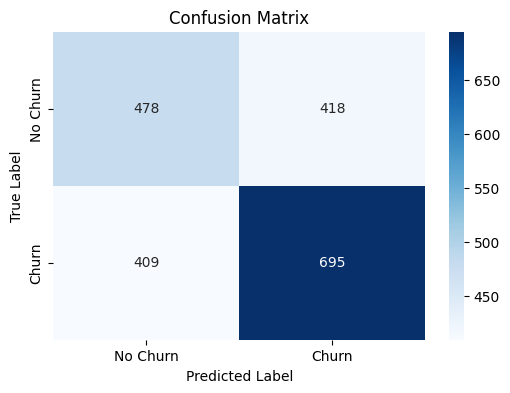

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_np = y_test_tensor.numpy()
predictions_np = predictions.numpy()

conf_matrix = confusion_matrix(y_test_np, predictions_np)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test_np, predictions_np, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.54      0.53      0.54       896
       Churn       0.62      0.63      0.63      1104

    accuracy                           0.59      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.59      0.59      0.59      2000



In [34]:
torch.save(model.state_dict(), 'neural_network_model_final.pth')

In [37]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor[4])
    predictions = (predictions > 0.5).float()

In [38]:
predictions

tensor([1.])

In [42]:
X_test_tensor[4]

tensor([ 0.7015,  0.0000,  1.0000, -0.4093, -1.3892, -0.4042,  0.5600, -1.1639,
        -1.4804,  1.0000, -0.7698])

In [52]:
model = FixedNeuronsNetwork(num_features=11,num_classes=1,num_hidden_layers=3,hidden_neurons=64).to(device)

In [ ]:
config = {
    "num_features" : 11,
    "num_classes" : 1,
    "num_hidden_layers" : 3,
    "hidden_neurons" : 64
}

11

In [54]:
model.load_state_dict(torch.load("neural_network_model_final.pth"))

<All keys matched successfully>

In [ ]:
def get_cluster(sample):
    sample_scaled = encode_and_scale(sample)
    group = kmeans_loaded.predict(sample_scaled)

    return group

In [55]:
def get_churn_label(sample):
    sample_tensor = torch.tensor(sample, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        predictions = model(sample_tensor)
        predictions = (predictions > 0.5).float()

    return predictions

In [56]:
preds = get_churn_label(X_test_tensor[4])

/var/folders/ph/0dhbgp7j00v4mkj_24jmp3mr0000gn/T/ipykernel_11061/1278522617.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample_tensor = torch.tensor(sample, dtype=torch.float32)


In [57]:
preds

tensor([1.])

In [61]:
sample

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge
0,0.835671,1,2,1.088886,-1.489266,-1.096673,-0.859519,-1.109064,-1.480403,0,-1.496581
1,1.707517,0,0,0.589484,-0.366456,0.409839,0.560000,-0.590169,-0.185326,2,-0.043096
2,0.165020,0,1,-0.409320,0.608206,0.680030,-0.859519,-0.191265,1.109752,3,0.683647
3,-0.773891,0,2,-0.409320,-1.350918,-0.988135,1.979519,-0.392746,-1.480403,1,-0.769839
4,1.103931,1,1,0.689364,-0.020518,-0.413914,-0.859519,0.746462,-0.185326,2,-0.043096


In [62]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Average_Internet_Usage,No_of_Tickets,Average_Talktime_Usage,Social_Class,Subscription_Type,Base_Charge
0,1,Customer_1,56,Male,Urban,29,286.658992,24.945633,0,23.316484,1,A,100
1,2,Customer_2,69,Female,Rural,24,706.286532,241.090001,1,97.662416,2,C,300
2,3,Customer_3,46,Female,Suburban,14,1070.546459,279.855149,0,154.816437,3,D,400
3,4,Customer_4,32,Female,Urban,14,338.363834,40.517955,2,125.948657,1,B,200
4,5,Customer_5,60,Male,Suburban,25,835.573690,122.903374,0,289.171509,2,C,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Customer_9996,55,Male,Suburban,34,676.156043,64.540758,3,158.962291,2,C,300
9996,9997,Customer_9997,51,Female,Rural,16,337.508892,10.041086,0,128.771894,1,B,200
9997,9998,Customer_9998,57,Female,Rural,27,1483.984362,401.194578,1,397.613115,3,E,500
9998,9999,Customer_9999,64,Male,Suburban,4,311.640946,87.497384,0,27.245347,1,B,200


In [68]:
main_df = df.drop(columns = ["CustomerID", "Name"])

categorical_cols = main_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(col)
    print(main_df[col].unique())
    print("--------------")

Gender
['Male' 'Female']
--------------
Location
['Urban' 'Rural' 'Suburban']
--------------
Subscription_Type
['A' 'C' 'D' 'B' 'E']
--------------


In [69]:
print(main_df.columns)

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Average_Internet_Usage', 'No_of_Tickets',
       'Average_Talktime_Usage', 'Social_Class', 'Subscription_Type',
       'Base_Charge'],
      dtype='object')
